# Designing a Task Scheduler

### Minerva University

### Auther: Rwan Khalifa

### Prof. Ribeiro

### October 31, 2023

___________
__________

# Setting Up


**The following tasks are to be used to test the scheduler**

**Regular Tasks and Why that choice**

1) Getting Dressed

Only happens after waking up.
    
2) Eat Breakfast 

It depends on waking up first and then getting dressed.
    
3) Bring ID and Charge the T money card

Both will happen after having breakfast and getting ready to go out.
However, Bringing ID is restricted to the location (I have to get it before going out).
Both tasks have the same number of dependencies and therefore:
The choice of which task to be excuted first will depend on some attributes as location restriction.  

4) Go to Cafe 

Depends on Charging the T money card
    
5) Contact Applicants

Depends on Collecting applicant details which will happen after going to the Cafe.
    
6) Attend CS110 Session 

Depends on doing PCW which is a location restricted task that I aim to perform at the Cafe.
A task such as PCW has a deadline and this factor would contribute on prioritizing the task.
    
7) Go back to the Res

Depends on finishing all the tasks and going back from the Cafe.


**rotation-city-centered tasks**

1) Go to Uni_Korea Foundation

Will not happen until the class is attended.
    
2) Research about the issue for the project

This task depends on going to the Uni_Korea Foundation and attending the session.
    
3) Create a poster

Depends on going to the Uni_Korea Foundation and researching about the issue for the project.
    
4) Create a video

Depends on creating a poster.
    
       
    
**The Significance of the Rotation-City-Centered Tasks**


   By interacting with individuals in the Uni_Korea Foundation, they can provide valuable insights into local issues and initiatives related to equity and inclusion.

   I could start my independent research on equity and inclusion issues in South Korea. Use online resources, academic articles, and local news to gather information. Engage with local students or professors who can provide insights.

   By creating a poster, I can summarize and showcase the issue for a specific audience (Minerva students and university students). It would enable me as an international student to be an active community member and look at the city from a resident's perspective. 

   By integrating our learning and the HCs, especially in #multimedia, I could serve #purpose, delivering the message to the proper audience.  
      

In [10]:
import pandas as pd

# Define your Task, TaskScheduler classes here

# Create the list of tasks
tasks = [
    Task(0, 'Wake up at 7:00 AM', 10, [], start_time=None, deadline=None, location_restricted=False),
    Task(1, 'Get dressed and ready', 20, [0], start_time=None, deadline=None, location_restricted=False),
    Task(2, 'Eat a healthy breakfast', 30, [0, 1], start_time=None, deadline=None, location_restricted=True),
    Task(3, 'Charge T-money Card', 10, [2], start_time=None, deadline=None, location_restricted=False),
    Task(4, 'Go to a cafe', 20, [3], start_time=None, deadline=None, location_restricted=False),
    Task(5, 'Contact applicants', 80, [6], start_time=None, deadline=None, location_restricted=False),
    Task(6, 'Collect applicants contact', 20, [4], start_time=None, deadline=None, location_restricted=False),
    Task(7, 'Do PCW', 120, [4], start_time=None, deadline=None, location_restricted=True),
    Task(8, 'Attend CS110 session', 90, [7], start_time=None, deadline=None, location_restricted=True),
    Task(9, 'Go back to the Res', 20, [14], start_time=None, deadline=None, location_restricted=False),
    Task(10, 'Go to Uni_Korea Foundation', 10, [8], start_time=None, deadline=None, location_restricted=False),
    Task(11, 'Research about the issue for the project', 60, [10, 8], start_time=None, deadline=None, location_restricted=False),
    Task(12, 'Create a poster', 120, [10, 11], start_time=None, deadline=None, location_restricted=False),
    Task(13, 'Bring ID', 5, [2], start_time=None, deadline=None, location_restricted=True),
    Task(14, 'Create a video', 120, [12], start_time=None, deadline=None, location_restricted=False)
]

# Set fixed start times for specific tasks
tasks[0].start_time = 7 * 60  # Task 1 starts at 7:00 AM
tasks[8].start_time = 16 * 60
tasks[10].start_time = 18 * 60

# Set deadlines for some tasks
tasks[7].deadline = 16 * 60  # PCW should be finished before the session

# Create a Pandas DataFrame from the tasks
data = {
    'Task ID': [task.id for task in tasks],
    'Description': [task.description for task in tasks],
    'Duration (mins)': [task.duration for task in tasks],
    'Dependencies': [task.dependencies for task in tasks],
    'Start Time (mins)': [task.start_time for task in tasks],
    'Deadline (mins)': [task.deadline for task in tasks],
    'Location Restricted': [task.location_restricted for task in tasks]
}

df = pd.DataFrame(data)

# Print the DataFrame
df


,Task ID,Description,Duration (mins),Dependencies,Start Time (mins),Deadline (mins),Location Restricted
0,0,Wake up at 7:00 AM,10,[],420.0,NaN,False
1,1,Get dressed and ready,20,[0],NaN,NaN,False
2,2,Eat a healthy breakfast,30,"[0, 1]",NaN,NaN,True
3,3,Charge T-money Card,10,[2],NaN,NaN,False
4,4,Go to a cafe,20,[3],NaN,NaN,False
5,5,Contact applicants,80,[6],NaN,NaN,False
6,6,Collect applicants contact,20,[4],NaN,NaN,False
7,7,Do PCW,120,[4],NaN,960.0,True
8,8,Attend CS110 session,90,[7],960.0,NaN,True
9,9,Go back to the Res,20,[14],NaN,NaN,False


# Preparing the Algorithmic Strategy

**Part (A) **

**a**
I'm utilizing a priority queue that operates on the Binary heap (Max Heap) as a data structure in this context for the following reasons:

1) Dependency Dynamic Handling: 

In this algorithmic strategy, tasks are ordered based on two proxies: Task dependencies and Task priority.
While preparing the tasks by pushing them into the priority queue, they are not pushed if their dependencies are not satisfied. Once satisfied, pushing them into the priority queue will depend on which task has a higher priority value than the other. This process is done dynamically as the number of dependencies changes while running the algorithm, allowing for more tasks to be pushed into the priority queue. Utilizing an ordered list will not be optimal for this dynamic handling of tasks since the tasks' order doesn't depend on only a single priority value that is fixed for every task. Thus, using a list will require applying a sorting algorithm every time a task is executed to adjust for the changing number of dependencies. This process will not be time efficient as it would take O(n) * O(the chosen sorting algorithm time complexity)) where n is the number of tasks.

For example: Using quicksort O(n^2) for every time a new task is added O(n) will result in an upper bound of O(n^3), indicating the algorithm would scale in a cubic time as the input size increases. 


2) Efficiency: 

The operations such as accessing the tasks, inserting tasks and deleting tasks are time efficient using priority queues. 

The operations on the Binary Heap have a time complexity as follows:

Insertion (Push) and delection (Pop): O(log n) When inserting a new task into a binary heap or removing the task with the highest priority from the Max Heap, the worst-case time complexity is logarithmic in the number of elements in the heap.

Accessing Tasks (Peek): O(1) - Accessing the task with the highest priority can be done in constant time, as it is the root of the heap. This is crucial for retrieving the next task to execute quickly.



3) Task Pausing: 

In this algorithmic strategies, I'm accounting for tasks that has fixed start time. For that purpose, some tasks will potentially be paused allowing the fixed-time task to excuted and then resumed afterwards. Using the priority queue will allow pausing the task back to the priority queue meaning that it is paused, and efficiently resuming it by popping the task again when the fixed-time task is finished.
This process might impose extra input size as a task can be splitted and thus would be more effecint to use the priority queue rather than a list and soting it every time a task is to be added. 


**Why Single Priority Queue**

In this algorithmic strategy, I'm using a single priority queue to dynamically handle all the tasks. This strategy benefits from imposing a constraint for the tasks that has fixed start time. This strategy will be more efficient for handling larger input size as it reduces the memory cost for creating 2 priority queues.

In the process of using 2 priority queues, I'll have to use one Max Heap to have the flexible tasks sorted based on the highest calculated priority value + Another Min Heap for the fixed-time task so that the task with earlier time is prioritized.

Maintaining those 2 priority queues would be costly in terms of memory. Moreover, I will need to have a synchronization of task execution between both priority queues so that when the current time matches the starting time of a task, a task from the Min Heap should be popped and the task being executed from the other priority queue would be pushed back if not finished. Those operations would happen inside a while loop that goes over both priority queues, and thus more complex.



**Part (B)**

This algorithmic strategy works as follows:


THE INPUT:

The input nature is given as a class with attributes (priorities) and methods (functions):
The tasks provided by the user have some properties including:

- Task id: a unique task identifier (that other tasks can reference).
- Task Description: a short description of the task
- Task duration: how long a task takes in minutes.
- Task dependencies: list of tasks id’s indicating whether the current task cannot begin until all of its dependencies have been completed.
- Task status: the state of a task; possible values are not_yet_started, in_progress, or completed.
- Task start time: the task's fixed start time, None if the task is flexible 
- Task deadline: the task's specified deadline, None if there is no deadline
- Task location restriction: If the task depends on being done in the same location as the previous task; possible values True or False.


The strategy also calculates priority values and assigns them to each task. All tasks will have a default priority value of 10 utils. If the task is location_restricted, its priority value will increase by 5 utils. If the task has a specified deadline, its priority will increase by 15 utils. 

Those properties, along with the priority function (method), are identifiers for each given task. 


The priority value isn't the only proxy that makes the order of task execution. It's an auxiliary value as the main determinant of tasks' execution in this strategy is the dependencies; a task will not be executed until all other tasks it depends on are executed. However, if two tasks have no dependencies, then the order of execution will depend on the priority value. This way, it handles the situation of tasks that might have the same priority value but different dependencies or tasks having the same dependencies but different priority values. 

(Note: I need to test a case where tasks have the same priority value and same dependencies)


PROCESSING THE INPUT (Using Max Heap for the priority queue):

1) To keep track of the current time and total time while running the scheduler, the current time will be set to the start time given by the user. The total time is initially zero.


2) All inputs will have a default status value of NOT_STARTED('N'), indicating that those tasks are not yet scheduled and are not in the priority queue (IN_PRIORITY_QUEUE).

3) In order to get the tasks on the priority queue, the algorithm will go over all the tasks provided in the list of tasks and check their status if they are not yet started and if they don't have dependencies. 

4) If those tasks meet those 2 conditions, their status will change so that they are known they are in the priority queue. We will push them to the priority queue so that the tasks that have a higher calculated priority value will be on top of the queue (since it's a max heap, the highest priority value will be at the root).

5) The algorithm will start by indicating that there are no current tasks in execution and will iteratively check whether there are any unscheduled tasks or if there are tasks that are still in the priority queue and ready to be executed.

6) While either of those conditions is met:
    
    a) If there is no current task in execution, then the algorithm pops the task at the top of the queue and removes it from the list, indicating that it's being executed. After the task is performed over its duration (current time updated based on the duration of the task execution), it will be removed from the list of dependencies of any other task, if any. Its status will be updated to COMPLETE, and the total duration of all tasks executed will be incremented by the duration. 
    
    b) If there is already a task that is currently in execution, then the algorithm checks the next task by getting the task on top of the priority queue without popping it. If that next task has a specified start time (Fixed-time task) and the current time is approaching the next task's start time, then:
    
    The current task will be paused, meaning it will go back to the priority queue, and its duration will be decreased based on how long it took to run. Now, the next task becomes the current task and starts being executed (popped from the priority queue) and then removed from the list of dependencies after being finished. The paused task will be resumed afterward since it is on the top of the priority queue and again removed from the list of dependencies after being finished.  
    

THE OUTPUT:

Excution of the task scheduler would result on printing the tasks in terms of their order of execution. All the tasks will have the start time, duration and finish time of the task. The overall time of tasks execution will be displayed after all tasks are completed. 




**Part (C)**

UTILITY AND PRIORITY VALUE

As indicated, The order of task execution will depend on the task's dependencies. A task with no dependencies will be pushed to the priority queue. However, there is a thin line that determines how a situation of multiple tasks with no dependencies can be pushed into the queue. 

In this situation, a priority value is calculated. Unlike how the expected utility is calculated by adding the multiplication of the value of each outcome with its probability, in this scenario, the outcomes represent multiple metrics; however, their probabilities or weights are unknown. 

The utility value (priority) of the task upon the definition of a risk-neutral agent would be objectively evaluated and will be the same as the expected utility value. 

I started by determining the factors that go into the utility function as Location restriction and deadline. 
Both outcomes have a probability of 0.5:

Location restriction has 2 expected outcomes: True or False.
Deadline has 2 expected outcomes: None or a numerical value.

Therefore, the utility function is calculated as follows:

           𝑛
𝐸[𝑈(𝑋)] = ∑ 𝑈(𝑥𝑖)𝑃(𝑥𝑖)
          𝑖=1 
          
Thus E(U (task i)) = U(task.dependencies == None)* 1 + U(task.location_restricted == True) * 0.5 + U(task.location_restricted == False) * 0.5 + U(task.deadline == None) * 0.5 + U(task.deadline == Numerical value) * 0.5 

Where:
(Those given utility values are arbitrary and depend on the developer's perspective here. Deadlines have a higher value than tasks being performed in a specific location. And since all tasks will not be pushed into the queue without having a None value for the dependencies, the probability of this outcome is always 1)

U(task.dependencies == None) = 10     
U(task.location_restricted == True) = 10 
U(task.location_restricted == False) = 0 
U(task.deadline == None) = 0
U(task.deadline == Numerical value) = 20

Note that this priority calculation doesn't indicate the overall priority of the task. This value is used when the dependencies are none to determine the priority of tasks with no dependencies and which to execute first. 

The implementation of this utility function is done as a method in the Tasks class and is used to push the Tasks into the priority queue. 


EXAMPLE: 

An example of how this works is shown between both tasks 3 ('Charge T-money Card') & 13 ('Bring ID'):
Where both tasks depend of Task 2 to be executed and once there are no dependencies for those tasks, the order of their execution will depend on their priority value:

Since task 3 has no location_restriction while task 13 does have a location_restriction, both of them have no deadline and both of them have no dependencies left:

E(U (task i)) = U(task.dependencies == None)* 1 + U(task.location_restricted == True) * 0.5 + U(task.location_restricted == False) * 0.5 + U(task.deadline == None) * 0.5 + U(task.deadline == Numerical value) * 0.5 

Expected utility of task 3 = 10 * 1 + 0 * 0.5 + 0 * 0.5 + 0 * 0.5 + 0 * 0.5 = 10
Expected utility of task 13 = 10 * 1 + 10 * 0.5 + 0 * 0.5 + 0 * 0.5 + 0 * 0.5 = 15

Therefore, task 13 ('Bring ID') will be executed before task 3 ('Charge T-money Card') because it has a higher expected utility based on one of the specified metrics (location restriction). 


NOTE:

The code implementation already accounts for the probability of the outcome:

       priority = 10
       #(10 * 1) since the task has no dependencies
       
       
       if self.location_restricted:
            priority += 5  
            #(10 * 0.5) = 5
            
        
        if self.deadline is not None:
            if current_time + self.duration > self.deadline:
                priority += 10  
                #(20 * 0.5) = 10

# Python Implementation


**MaxHeap Class**

Tasks with no dependencies will be pushed into the priority queue based on the priority value. 
Since tasks with higher priority values will be executed first, a max heap implementation would be a suitable data structure to access tasks with the highest priority value in a constant time operation since they exist at the root of the Binary Max Heap Tree. 

The class implementation allows the creation of an instance of that class (here a priority queue). The methods of that class will then be applied to this instance (the priority queue object).

The code is modified from class to account for the input type. The Heap will not include integer values and rather instances of the Task class.

Since that class also has attributes and methods, I will utilize the priority method as the priority value to be able to successfully heapify, push, pop and access the Tasks objects in the priority queue.

**Task Class**

The task class is a fingerprint for the class instances of the multiple tasks the algorithm will operate on. 

It has the following attributes as described in part B of the algorithmic strategy:
- Task id.
- Task Description.
- Task duratio.
- Task dependencies.
- Task status.
- Task start time.
- Task deadline.
- Task location restriction.

It has one method: 
PRIORITY to calculate the priority value of tasks with no dependencies list and thus ready to be pushed into the priority queue:
depending on the two attributes (Task deadline AND Task location restriction)


**Task TaskScheduler**

The task scheduler class is modified for the session breakout to utilize the MaxHeap class and its methods instead of the heapq module. 

The method run_task_scheduler is greatly modified to account for the constraint of the fixed time, as explained in part B in the algorithmic strategy. 

In [2]:
#Create the max heap data structure
class MaxHeapq:
    """ 
    A class that implements properties and methods 
        that support a max priority queue data structure

        Attributes
      ----------
        heap : arr
          A Python list where key values in the max heap are stored
        heap_size: int
          An integer counter of the number of keys present in the max heap
      """  

    def __init__(self):    
        """
        Parameters
        ----------
        None
        """    
        self.heap       = []
        self.heap_size  = 0
        
    def left(self, i):
        """
        Takes the index of the parent node
        and returns the index of the left child node

        Parameters
        ----------
        i: int
          Index of parent node

        Returns
        ----------
        int
          Index of the left child node
        """
        return 2 * i + 1

    def right(self, i):
        """
        Takes the index of the parent node
        and returns the index of the right child node
        
        Parameters
        ----------
        i: int
            Index of parent node

        Returns
        ----------
        int
            Index of the right child node
        """
        return 2 * i + 2
		
    def parent(self, i):
        """
        Takes the index of the child node
        and returns the index of the parent node
        
        Parameters
        ----------
        i: int
            Index of child node

        Returns
        ----------
        int
            Index of the parent node
        """

        return (i - 1)//2

    def maxk(self, current_time):     
        """
        Returns the highest key (priority value) in the priority queue. 
        
        Parameters
        ----------
        current_time: int
            the current time in minutes
        

        Returns
        ----------
        int
            the highest key in the priority queue
        """
        return self.heap[0].priority(current_time)
    
    def peek(self, current_time):
        """
        Returns the task with the highest priority value in the priority queue without removing it.

        Parameters
        ----------
        current_time: int
            The current time used for determining task priorities.

        Returns
        ----------
        object
            The task with the highest priority (next task to be executed).
        """
        if self.heap_size < 1:
            raise ValueError('Heap is empty: There are no keys in the priority queue.')
        return self.heap[0]
  
    def heappush(self, task, current_time):  
        """
        Insert a key into a priority queue 
        
        Parameters
        ----------
        task: object
            The task object to be inserted into the priority queue.
       
        current_time: int
            the current time in minutes

        Returns
        ----------
        None
        """
        # Append a placeholder Task instance with a very low duration to the end of the heap
        self.heap.append(Task(id=-1, description="", duration=float("-inf"), 
                              dependencies=[], start_time=None, deadline=None))
    
        # Increase the key's value to the desired value while maintaining the max-heap property
        self.increase_key(self.heap_size, task, current_time)
    
        # Increment the heap size to reflect the new element
        self.heap_size += 1
        
    def increase_key(self, i, task, current_time):
        """
        Modifies the value of a key (the priority value of the given task) in a max priority queue
        with a higher value
        
        Parameters
        ----------
        i: int
            The index of the key to be modified
        
        task: object
            The task object to be inserted into the priority queue.
       
        current_time: int
            the current time in minutes

            

        Returns
        ----------
        None
        """
        if task.priority(current_time) < self.heap[i].priority(current_time):
            raise ValueError('New task id is smaller than the current task duration')
        self.heap[i] = task
        while i > 0 and self.heap[self.parent(i)].priority(current_time) < self.heap[i].priority(current_time):
            j = self.parent(i)
            holder = self.heap[j]
            self.heap[j] = self.heap[i]
            self.heap[i] = holder
            i = j
    
       
    def heapify(self, i, current_time):
        """
        Creates a max heap from the index given by the priority value of the task object
        
        Parameters
        ----------
        i: int
            The index of of the root node of the subtree to be heapify

        current_time: int
            the current time in minutes
            
        Returns
        ----------
        None
        """
        l = self.left(i)
        r = self.right(i)
        heap = self.heap
        if l <= (self.heap_size-1) and heap[l].priority(current_time) > heap[i].priority(current_time):
            largest = l
        else:
            largest = i
        if r <= (self.heap_size-1) and heap[r].priority(current_time) > heap[largest].priority(current_time):
            largest = r
        if largest != i:
            heap[i], heap[largest] = heap[largest], heap[i]
            self.heapify(largest, current_time)


    def heappop(self, current_time):
        """
        returns the task with largest priority value in the max priority queue
        and remove it from the max priority queue
        
        Parameters
        ----------
        current_time: int
            the current time in minutes

        Returns
        ----------
        int
            the task with the max priority value in the heap that is extracted
        """
        if self.heap_size < 1:
            raise ValueError('Heap underflow: There are no keys in the priority queue ')
        max_task = self.heap[0]
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        self.heap_size-=1
        self.heapify(0, current_time)
        return max_task

In [4]:
class Task:
    """
    Attributes
        ----------
        - Task id: a unique task identifier (that other tasks can reference).
        - Task Description: a short description of the task
        - Task duration: how long a task takes in minutes.
        - Task dependencies: list of tasks id’s.
        - Task status: the state of a task.
        - Task start time: the task's fixed start time, None if the task is flexible 
        - Task deadline: the task's specified deadline, None if there is no deadline
        - Task location restriction: If the task depends on being done in the same location.
    """
    
    def __init__(self, id, description, duration, dependencies, status="N", start_time=None, 
                 deadline=None, location_restricted=False):
        """
        Parameters
        ------
        Task attrinutes
        """
        self.id = id
        self.description = description
        self.duration = duration
        self.dependencies = dependencies
        self.status = status
        self.start_time = start_time
        self.deadline = deadline
        self.location_restricted = location_restricted

    
    def priority(self, current_time):
        """
        returns the priority value for each task
        
        Parameters
        ----------
        current_time: int
            the current time in minutes

        Returns
        ----------
        int
            the calculated priority value
        """
        #initially all tasks will have a priority of 10
        priority = 10

        # Add weight for location restriction
        if self.location_restricted:
            priority += 5  # Higher priority if location-restricted
            
        # Add weight for the deadline
        if self.deadline is not None:
            if current_time + self.duration > self.deadline:
                priority += 10  # Higher priority if the task is approaching or missing the deadline
        

        return priority

In [5]:
class TaskScheduler:
    """
    Attributes
    ----------
    None
    """

    NOT_STARTED = 'N'
    IN_PRIORITY_QUEUE = 'I'
    COMPLETED = 'C'
    
    def __init__(self, tasks):
        """
        Parameters
        ----------
        tasks: instances of the Task class 
        
        Returns
        -------
        None
        """
        self.tasks = tasks 
        self.priority_queue = MaxHeapq()
        
        
    def print_self(self):
        """
        prints the formatted input
        
        Parameters
        ----------
        None
        
        
        Returns
        -------
        None
        """
        print("Tasks added to the simple scheduler:")
        print("--------------------------------------")
        for t in self.tasks:
            print(f"➡️'{t.description}', duration = {t.duration} mins.")   
            if len(t.dependencies) > 0:
                print(f"\t ⚠️ This task depends on others!")
    
            
    def remove_dependency(self, id):
        """
        removed the dependencies based on the id
        
        Parameters
        ----------
        id: int
        
        Returns
        -------
        None
        """
        for task in self.tasks:
            if task.id != id and id in task.dependencies:
                task.dependencies.remove(id)           
            

    def get_tasks_ready(self, current_time):
        """
        pushes the task in the priority queue and change their status from NOT_STARTED to IN_PRIORITY_QUEUE.
        This only happens if the task has no dependencies left
        
        Parameters
        ---------
        current_time: int
            the current time in minutes
            
        Returns
        -------
        None
        """
        for task in self.tasks:
            # If the task has no dependencies and is not yet in the queue
            if task.status == self.NOT_STARTED and not task.dependencies: 
                # Update status of the task
                task.status = self.IN_PRIORITY_QUEUE 
                # Push task into the priority queue
                self.priority_queue.heappush(task, current_time)

    
    def check_unscheduled_tasks(self):
        """
        Checks for unscheduled tasks
        
        Parameters
        ----------
        None
        
        Returns
        -------
        Bool: True or False
        """
        for task in self.tasks:
            if task.status == self.NOT_STARTED:
                return True
        return False   
    
    def format_time(self, time): 
        """ 
        formats the time in hours and minutes
        
        Parameters
        ----------
        time: int
            time given in minutes
            
        Returns
        ------
        formatted time
        """
        return f"{time//60}h{time%60:02d}"
    
    def run_task_scheduler(self, starting_time):
        """
        The processing of the input so that tasks that are ready are executed based on their priority values. 
        
        Parameters
        ---------
        starting_time: int
            time given in minutes
            
        Returns
        -------
        None
        """
        current_time = starting_time
        total_time = 0  # Initialize total time
        current_task = None  # Initialize current task
       
        
        print("Running a simple scheduler:\n")
        while self.check_unscheduled_tasks() or self.priority_queue.heap_size > 0:
           
            # Identify tasks that are ready to execute
            # (those without dependencies) and push them into the priority queue
            self.get_tasks_ready(current_time)
    
            #Check for tasks in the priority queue
            if self.priority_queue.heap_size > 0:
                
                # If there is a current task, check if it needs to be paused
                if current_task is not None:
                    next_task = self.priority_queue.peek(current_time)  # Get the next task without popping it
                    
                    if next_task.start_time is not None and \
                       next_task.start_time < current_time + current_task.duration:  
                        
                        # Pause the current task and push it back into the priority queue
                        current_task.duration -= (next_task.start_time - current_time)
                        self.priority_queue.heappush(current_task, current_time)
                        current_task = self.priority_queue.heappop(current_time)
                        
                            
                # If there is no current task, pop the next task from the priority queue
                if current_task is None:
                    current_task = self.priority_queue.heappop(current_time)
                
                # Adjust  the current_time based on task's start_time
                if current_task.start_time is not None and current_task.start_time > current_time:
                    current_time = current_task.start_time
                    print("[FIXED TIME TASK!]")

                print(f"🕰t={self.format_time(current_time)}")
                print(f"\tstarted '{current_task.description}' for {current_task.duration} mins... ")
                current_time += current_task.duration
                print(f"\t✅ t={self.format_time(current_time)}, task completed!")

                # If the task is done, remove it from the dependency list
                self.remove_dependency(current_task.id)
                current_task.status = self.COMPLETED
                total_time += current_task.duration
                current_task = None    #reset the current_task
                

        print(f"\n🏁 Completed all planned tasks in {total_time//60}h{total_time%60:02d}min!")

In [11]:
#TEST CASES
#NOTE: the priority value alone isn't the determenant of the task order and hence checking the dependencies.
max_heap = MaxHeapq()

# Create tasks
tasks = [
    Task(0, 'Print the Visa Documents', 10, [1, 2], start_time=None, deadline=None, location_restricted=True),
    Task(1, 'Fill the visa application', 70, [], start_time=None, deadline= 60*5, location_restricted=False),
    Task(2, 'Upload the files on the drive', 10, [], start_time=None, deadline= None, location_restricted=False),
    Task(3, 'Send the documents to the city director', 10, [1, 2], start_time=None, deadline=None, location_restricted=False)
]



#test case 1: asserting if the method of heappush

# Insert tasks into the max heap
current_time = 5 # Initial current time
for task in tasks:
    if not task.dependencies:
        max_heap.heappush(task, current_time)


#test case 2: 
#Verify that the max key retrieval returns the task with the highest priority
max_task = max_heap.peek(current_time)
assert max_task.id == 1  # Between task 1 and  2, Task 1 has the highest priority


#Verify task execution
first_executed = max_heap.heappop(current_time)
assert first_executed.id == 1

#Test case 3: 
#make sure it's comparing based on the priority value
next_executed = max_heap.heappop(current_time)
assert next_executed.id == 2 


#test case 4: 
#if the dependencies are not checked then the first task checked in the loop here has higher priority value
current_time = 5 # Initial current time
for task in tasks:
    max_heap.heappush(task, current_time)

just_executed = max_heap.heappop(current_time)
assert just_executed.id == 0



In [6]:
tasks = [
    Task(0, 'Wake up at 7:00 AM', 10, [], start_time=None, deadline=None, location_restricted= False),
    Task(1, 'get dressed and ready', 20, [0], start_time=None, deadline=None, location_restricted= False),
    Task(2, 'eat a healthy breakfast', 30, [0, 1], start_time=None, deadline=None, location_restricted= True),
    Task(3, 'Charge T-money Card', 10, [2], start_time=None, deadline=None, location_restricted= False),
    Task(4, 'Go to a cafe', 20, [3], start_time=None, deadline=None, location_restricted= False),
    Task(5, 'Contact applicants', 80, [6], start_time=None, deadline=None, location_restricted= True),
    Task(6, 'Collect applicants contact', 40, [4], start_time=None, deadline=None, location_restricted= True),
    Task(7, 'Do PCW', 120 , [4], start_time=None, deadline=None, location_restricted= True),
    Task(8, 'Attend CS110 session', 90 , [7], start_time=None, deadline=None, location_restricted= True),
    Task(9, 'Go back to the Res', 20 , [14], start_time=None, deadline=None, location_restricted= False),
    Task(10, 'Go to Uni_Korea Foundation', 10 , [8], start_time=None, deadline=None, location_restricted= False),
    Task(11, 'Research about the issue for the project', 60, [10, 8, 4], start_time=None, deadline=None, location_restricted= False),
    Task(12, 'Create a poster', 120, [10, 11], start_time=None, deadline=None, location_restricted= False),
    Task(13, 'Bring ID' , 5, [2], start_time=None, deadline=None, location_restricted= True),
    Task(14, 'Create a video', 120, [12], start_time=None, deadline=None, location_restricted= False)    
]

# Set fixed start times for specific tasks
tasks[0].start_time = 7 * 60  # Task 1 starts at 7:00 AM
tasks[8].start_time = 16 * 60  
tasks[10].start_time = 18 * 60   

#set deadlines for some tasks
tasks[7].deadline = 16 * 60    #PCW should be finished before the session

task_scheduler = TaskScheduler(tasks)
task_scheduler.print_self()
task_scheduler.run_task_scheduler(7*60)

Tasks added to the simple scheduler:
--------------------------------------
➡️'Wake up at 7:00 AM', duration = 10 mins.
➡️'get dressed and ready', duration = 20 mins.
	 ⚠️ This task depends on others!
➡️'eat a healthy breakfast', duration = 30 mins.
	 ⚠️ This task depends on others!
➡️'Charge T-money Card', duration = 10 mins.
	 ⚠️ This task depends on others!
➡️'Go to a cafe', duration = 20 mins.
	 ⚠️ This task depends on others!
➡️'Contact applicants', duration = 80 mins.
	 ⚠️ This task depends on others!
➡️'Collect applicants contact', duration = 40 mins.
	 ⚠️ This task depends on others!
➡️'Do PCW', duration = 120 mins.
	 ⚠️ This task depends on others!
➡️'Attend CS110 session', duration = 90 mins.
	 ⚠️ This task depends on others!
➡️'Go back to the Res', duration = 20 mins.
	 ⚠️ This task depends on others!
➡️'Go to Uni_Korea Foundation', duration = 10 mins.
	 ⚠️ This task depends on others!
➡️'Research about the issue for the project', duration = 60 mins.
	 ⚠️ This task depends o

In [7]:
#TEST CASE: Changing the order
tasks_1 = [
    Task(0, 'Print the Visa Documents', 10, [1, 2], start_time=None, deadline=None, location_restricted=True),
    Task(1, 'Fill the visa application', 20, [], start_time=None, deadline= None, location_restricted=False),
    Task(2, 'Upload the files on the drive', 10, [], start_time=None, deadline=None, location_restricted=False),
    Task(3, 'Send the documents to the city director', 10, [1, 2], start_time=None, deadline= 4 * 60, 
         location_restricted=False)
]

tasks_2 = [
    Task(0, 'Fill the visa application', 20, [], start_time=None, deadline= None, location_restricted=False),
    Task(1, 'Send the documents to the city director', 10, [0, 2], start_time=None, deadline= 4 * 60, 
         location_restricted=False),
    Task(2, 'Upload the files on the drive', 10, [], start_time=None, deadline=None, location_restricted=False),
    Task(3, 'Print the Visa Documents', 10, [0, 2], start_time=None, deadline=None, location_restricted=True),

]

assert TaskScheduler(tasks_1).run_task_scheduler(4*60) == TaskScheduler(tasks_2).run_task_scheduler(4*60)

Running a simple scheduler:

🕰t=4h00
	started 'Fill the visa application' for 20 mins... 
	✅ t=4h20, task completed!
🕰t=4h20
	started 'Upload the files on the drive' for 10 mins... 
	✅ t=4h30, task completed!
🕰t=4h30
	started 'Send the documents to the city director' for 10 mins... 
	✅ t=4h40, task completed!
🕰t=4h40
	started 'Print the Visa Documents' for 10 mins... 
	✅ t=4h50, task completed!

🏁 Completed all planned tasks in 0h50min!
Running a simple scheduler:

🕰t=4h00
	started 'Fill the visa application' for 20 mins... 
	✅ t=4h20, task completed!
🕰t=4h20
	started 'Upload the files on the drive' for 10 mins... 
	✅ t=4h30, task completed!
🕰t=4h30
	started 'Send the documents to the city director' for 10 mins... 
	✅ t=4h40, task completed!
🕰t=4h40
	started 'Print the Visa Documents' for 10 mins... 
	✅ t=4h50, task completed!

🏁 Completed all planned tasks in 0h50min!


# Algorithm Analysis

Running a simple scheduler:

🕰t=0h00
	started 'Task 0' for 92 mins... 
	✅ t=1h32, task completed!
🕰t=1h32
	started 'Task 1' for 74 mins... 
	✅ t=2h46, task completed!
🕰t=2h46
	started 'Task 2' for 69 mins... 
	✅ t=3h55, task completed!
🕰t=3h55
	started 'Task 3' for 34 mins... 
	✅ t=4h29, task completed!
🕰t=4h29
	started 'Task 8' for 30 mins... 
	✅ t=4h59, task completed!
🕰t=4h59
	started 'Task 4' for 20 mins... 
	✅ t=5h19, task completed!
🕰t=5h19
	started 'Task 5' for 21 mins... 
	✅ t=5h40, task completed!
🕰t=5h40
	started 'Task 6' for 83 mins... 
	✅ t=7h03, task completed!
🕰t=7h03
	started 'Task 7' for 80 mins... 
	✅ t=8h23, task completed!
🕰t=8h23
	started 'Task 9' for 88 mins... 
	✅ t=9h51, task completed!

🏁 Completed all planned tasks in 9h51min!
Running a simple scheduler:

🕰t=0h00
	started 'Task 0' for 31 mins... 
	✅ t=0h31, task completed!
🕰t=0h31
	started 'Task 1' for 92 mins... 
	✅ t=2h03, task completed!
🕰t=2h03
	started 'Task 2' for 83 mins... 
	✅ t=3h26, task completed!
🕰t

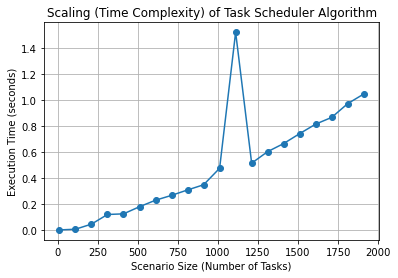

In [8]:
import timeit
import time
import matplotlib.pyplot as plt
import random

# not running the simulation for the sake of proper code readability
# feel free to uncomment
"""

# Function to generate a random input scenario with 'n' tasks
def generate_random_input_scenario(n):
    tasks = []
    for i in range(n):
        duration = random.randint(10, 100)  # Random duration between 10 and 100 minutes
        dependencies = random.sample(range(i), min(i, 3))  # Random dependencies on previous tasks
        tasks.append(Task(id=i, description=f"Task {i}", duration=duration, dependencies=dependencies))
    return tasks

# Generate a list of scenario sizes between 10 and 2000 with a step size of 100
scenario_sizes = list(range(10, 2001, 100))
execution_times = []

for size in scenario_sizes:
    input_scenario = generate_random_input_scenario(size)
    
    execution_time = timeit.timeit(lambda: TaskScheduler(input_scenario).run_task_scheduler(starting_time=0), 
                                   number=1)
    execution_times.append(execution_time)

# Plot the execution times and scenario sizes
plt.plot(scenario_sizes, execution_times, marker='o')
plt.xlabel('Scenario Size (Number of Tasks)')
plt.ylabel('Execution Time (seconds)')
plt.title('Scaling (Time Complexity) of Task Scheduler Algorithm')
plt.grid(True)
plt.show()
"""

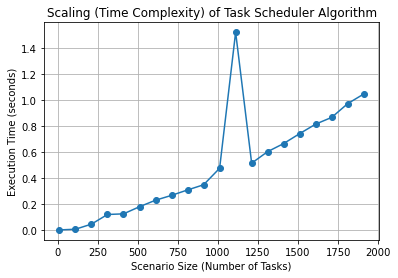

**The benefits of this algorithmic strategy to design a scheduler**

1- Utilizing the MaxHeap data structure to build a priority queue is more effeicnt than using a list and sorting it everytime a new input task is added. This effiecinlty handles dynamic input.

2- Utilizing a single priority queue and imposing a constraint for the tasks with fixed start time instead of using two prioreity queues is more memory effecint and easy to grasp. 

**Failure modes and limitations I envision this algorithmic strategy running into**

Even though the algorithm works as intended, there are several logical error i tried to account for but I aim to have longer time to figure them out:

1- The reason why Fixed Time tasks are performed on the exact time goes back to the line of the code:

                if current_task.start_time is not None and current_task.start_time > current_time:
                    current_time = current_task.start_time

2- Resetting the current task to None at the end of the while loop leaves the condition:
                
                if current_task is not None: 
   to be never satisfied.
                
                    next_task = self.priority_queue.peek(current_time)  # Get the next task without popping it
                    
                    if next_task.start_time is not None and \
                       next_task.start_time < current_time + current_task.duration:  
                        
                        # Pause the current task and push it back into the priority queue
                        current_task.duration -= (next_task.start_time - current_time)
                        self.priority_queue.heappush(current_task, current_time)
                        current_task = self.priority_queue.heappop(current_time)
   and therefore, the tasks are never paused. 
   
   If you try a task that has a duration exceeding the starting time for the fixed task, it will not be paused.
   
   Take those 2 tasks:  
   
    Task(8, 'Attend CS110 session', 90 , [7], start_time=None, deadline=None, location_restricted= True),
    Task(10, 'Go to Uni_Korea Foundation', 10 , [8], start_time=None, deadline=None, location_restricted= False).
    tasks[8].start_time = 16 * 60  
    tasks[10].start_time = 18 * 60  
   Testing the code, it works perfectly fine. 
   
   However, if we were to change the start time of task 10 to be 17 * 60, then it will just be delayed and the previous task will not be paused. 
   
   Another limitation, some tasks can't be paused (Mandatory tasks, i.e. attending a session, a meeting, etc.)
   
3- Not resetting the current task to None will make the condition true and check for the next task start time. 
However, the algorithm will run forever executing the first task and only the first task infinitly. 

Therefore, the algorithm has to:
1) be modified so that the condition becomes true at some point to checxk for the tasks with fixed start time. 
2) have a termination to the while loop.
3) Account for the tasks that can't be paused
4) Utilize unchanged current time tracking (not to be just changed by a line as:
    (current_time = current_task.start_time)

**a complexity analysis of how it scales with the number of inputs**


Theoritical Complexity analysis:

1. heappush:
   - This operation appends a task to the heap and then calls the `increase_key` method.
   - The `append` operation takes O(1) time.
   - The `increase_key` method might take up to O(log m) time in the worst case.
   - So, the overall time complexity of `heappush` is O(log m).

2. increase_key:
   - This method updates the priority of a task and maintains the max-heap property.
   - In the worst case, it may require moving the updated task up to the root of the heap, which takes O(log m) time.

3. heapify:
   - This method is used to maintain the max-heap property by recursively adjusting the elements in the heap.
   - The worst-case time complexity of this method is O(log m), where 'm' is the number of elements in the heap.

4. heappop:
   - This operation removes the task with the highest priority (i.e., the root of the heap) and then calls the `heapify` method to restore the max-heap property.
   - The removal of the root takes O(1) time, and the `heapify` operation takes O(log m) time in the worst case.
   - So, the overall time complexity of `heappop` is O(log m).

5. get_tasks_ready:
   - This method iterates through the tasks and checks if they have no dependencies and are not yet in the priority queue.
   - This operation has a time complexity of O(n), where 'n' is the number of tasks in the input.

6. check_unscheduled_tasks:
   - This method checks if there are any unscheduled tasks (tasks with status 'N').
   - It iterates through the tasks, so it has a time complexity of O(n).

7. run_task_scheduler:
   - The main scheduling loop runs until there are no unscheduled tasks or tasks in the priority queue.
   - Within the loop, there are calls to `get_tasks_ready`, `heappop`, and other methods, but the most significant time complexity comes from `heappop`, which is O(log m).

Therefore, the overall time complexity is dominated by the operations of O(log m) performed in a while loop that goes over the input size n resulting in a time complexity O(n log m).

However, basen on the observation:

The algorithm scales linearly with the input size. The reason might be that tasks are not all pushed into the heap, it's rather a very few number of tasks (here max 2) that are pushed in the heap at the same time (having no dependecies at the same time). This is mainly due to the condition that checks the task's dependencies. 

Therefore, the algorithm behaves as it had to work with a Binary Max Heap Tree with input size of 2. That indicates that the scaling is as follows O(n log 2) which is equivalent to O(n * 1) = O(n).


# DONE